<a href="https://colab.research.google.com/github/yatzirirain/Portfolio/blob/main/metodo_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Métodos de Montecarlo
### Yatziri Irain Venado Peña
---


### **1. Generador de números aleatorios.**

**Generador de números pseudo-aleatorios utilizando el método de congruencias lineales.**

Este programa nos genera una lista de numeros enteros pseudo-aleatorios en el intervalo $[0, M-1]$, primero se tiene que ingresar un valor en el intervalo (una semilla) para generar los numeros de manera recursiva:
$$x_n=[ax_{n-1}+c ]\mod m$$

In [ ]:
c=1
a=4
M=9
x_0=3        #Semilla

print(x_0)
x=(a*x_0+c)%M
print(x)

while x!=x_0:
  x=(a*x+c)%M
  print(x)


** Tomando la sucesión anterior, se grafican los pares $(x_{2i-1}, x_{2i})$,  $i=1,2,...$**

**Grafica $x_i$ vs $i$.**

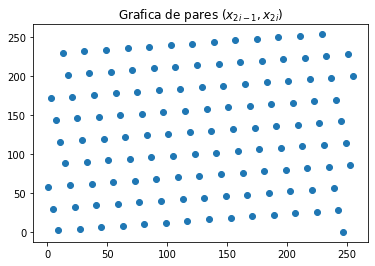

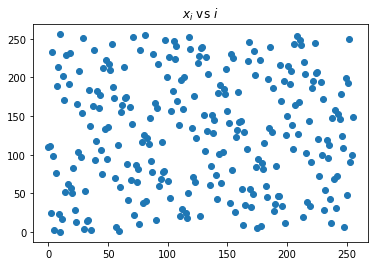

c(k)= 16238.87159533074


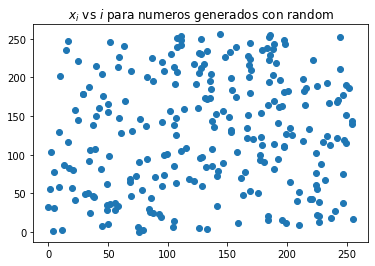

c(k)= 17531.37354085603


In [ ]:
import matplotlib.pyplot as plt
import random 

c=1
a=57
M=256
x_0=10                 #Semilla

lista=[x_0]            #Lista de numeros pseudo-aleatorios

x=(a*x_0+c)%M


while x!=x_0:
  x=(a*x+c)%M
  lista.append(x)

N=len(lista)           #cantidad de numeros pseudo-aleatorios generados
#print('N=',N)

#for i in range(N):    #imprimir los numeros pseudo-aleatorios generados 
#  print(i,lista[i])

X=[]                   #Numeros con indice impar 
Y=[]                   #Numeros con indice par

for i in range (1,N,2):
  X.append(lista[i])

for i in range (2,N,2):
  Y.append(lista[i])

plt.scatter (X,Y)                                  #Grafica del inciso c)
plt.title("Grafica de pares $(x_{2i-1}, x_{2i})$")
plt.show()


plt.scatter (lista,range(N))                       #Grafica del inciso d)
plt.title("$x_i$ vs $i$")
plt.show()

#Prueba de uniformidad

k=4
sum=0

for i in range(N):
  if i+k >=N:
    break
  sum=sum+(lista[i]*lista[i+k])
c=float(sum/N)
print('c(k)=',c)


#Numeros aleatorios de Python
lista2=[]
for i in range(N):
  lista2.append(random.randint(0,M-1))


plt.scatter (lista2,range(N))     #Grafica 
plt.title("$x_i$ vs $i$ para numeros generados con random")
plt.show()


#Prueba de uniformidad de numeros generados con random

k=4
sum=0

for i in range(N):
  if i+k >=N:
    break
  sum=sum+(lista2[i]*lista2[i+k])
c=float(sum/N)
print('c(k)=',c)



**Existen diversos métodos para estudiar si un conjunto de números
tiene o no una disribución uniforme.**

Una prueba sencilla que determina la uniformidad e independencia de los numeros generados es mediante la correlación entre vecinos cercanos de la secuencia aleatoria  tomando sumas de productos para k pequeños: 
$$C(k)=\frac{1}{N} \sum_{i=1}^N x_ix_{i+k}~~~~~~(k=1,2,...)$$

Si los números aleatorios $x_i$ y $x_{i+k}$ se distribuyen con la distribución de probabilidad conjunta $P(x{i},x{i+k})$ y son independientes y uniformes, entonces $C(k)$ puede aproximarse como una integral:

$$\frac{1}{N} \sum_{i=1}^N x_ix_{i+k} \approx \int_0^{255}  \int_0^{255} xy~P(x,y) dx dy=\frac{1}{255^2}\int_0^{255}x~dx\int_0^{255}y~dy
=\frac{255^2}{4}$$

Donde $P(x,y)=\frac{1}{255^2}$ porque $\int^\infty_\infty \int^\infty_\infty P(x,y) dx dy =1$


Así $C(k) \approx 16256.25$

Haciendo el calculo de $C(k)$ para $k=4$ nos da 16238.87 un valor bastante cercano al esperado, (cabe recalcar que este metodo funciona para valores pequeños de k).

 Asi que podemos decir que la distribución tiene un comportamiento uniforme, lo cual tiene sentido ya que en la lista de números generados aparecen todos los enteros comprendidos en el intervalo y cada uno aparece una sola vez.
Pero aún cuando la distribucion es aparentemente uniforme, no podemos afirmar la aleatoriedad de los números, cuando se grafican los pares $(x_{2i-1}, x_{2i})$ podemos notar un patron bastante evidente.

### **2.Integración**
**Solucion numerica de integrales mediente método de Montecarlo**

(a)$$\int ^1_0 (1-x^2)^{\frac{3}{2}}dx$$

Primero generamos una muestra de $n$ números pseudoaleatorios $\{U_1,U_2,...,U_n\}$ con la función `random.rand(n)` de la libreria `numpy`. Luego definimos la función a integrar, para después calcular su valor esperado, para esto sumamos todos los valores de la función evaluada en cada número pseudoaleatorio $U_i$ y dividimos esa suma entre $n$.
Sabemos que el valor de la integral se puede aproximar como:

$$\int ^1_0 g(x)dx= E[g(U)]\approx \frac{1}{n}\sum _{i=1}^{n}g(U_i)+\varepsilon(n)$$

In [ ]:
import numpy as np

n=1000000
U=np.random.rand(n)

def g(x):
  return (1-x**2)**(3/2)

suma=0
for i in range (n):
  suma=suma+g(U[i])

integral=suma/n 

print(integral)


0.5889302393432659


(b) $$\int ^2_{-2} e^{x+x^2}dx$$

Para calcular una integral en un intervalo distinto a $[0,1]$, hacemos el cambio de variable:
$$y=\frac{x-a}{b-a}$$


Así:
$$\int ^b_a g(x)dx= \int ^1_0 g[(b-a)y+a]~(b-a)dy=(b-a)\int ^1_0 h(y)dy$$

In [ ]:
import numpy as np
import math

n=1000000
a=-2
b=2

U=np.random.rand(n)

def g(x):
  return math.exp(x+x**2)
 
def h(y):
  return g((b-a)*y+a)

suma=0
for i in range (n):
  suma=suma+h(U[i])

integral=(suma/n)*(b-a) 

print(integral)

92.83706343496773


### **3. Calculando a $\pi$**
**Estimacion numerica del valor de $\pi$ mediante Montecarlo**

Generamos 2 conjuntos de $n$ números aleatorios $\{X_1,X_2,...,X_n\}$ y $\{Y_1,Y_2,...,Y_n\}$, y formamos $n$ pares ordenados $(X_i,Y_i)$.
Cada par representa un punto en el plano $xy$ y tendrán en principio una distribuición uniforme en el cuadrado $[0,1]\times[0,1]$, contamos los $k$ puntos que cumplen con la condicion $X_i^2+Y_i^2 \leq 1$, es decir los que estan adentro de la fraccion de círculo unitario en el primer cuadrante.
Así:
$$\frac{k}{n}\approx \frac{\pi}{4}$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

n=1000000
k=0

x=np.random.rand(n)
y=np.random.rand(n)

def z(x,y):
  return x*x+y*y

for i in range(n):
    if z(x[i],y[i])<=1.0:
        k=k+1

pi=4.0*(k/n)                                      
print(pi) 

3.141356
